## Examples of the method of successive concession (math and real world)
This notebook holds both mathematical and real world example of applying method of successive concession.
Note that real world example is more conceptual and gives you only an outline of the problem solving compared to math example.


### Mathematical example
Consider the following math example:

Current task is to use the method of successive concession to optimize the following creteria in the following way:

$
z_1 = 34x_1 + 24x_2 \,\to\, max \\
z_2 = -8x_1 - 7x_2 + 328 \,\to\, min
$

Note that $z_1 \succ z_2$, meaning that $z_1$ is a more important creteria than $z_2$

Answer is also required to stay within the following limiting bounds:

$
\begin{cases}
4x_1 + 3x_2 \leq 144 \\
2x_1 + x_2 \leq 64 \\
2x_1 + 3x_2 \leq 120 \\
x \geq 0 \\
x_2 \geq 0
\end{cases}
$

The task is to be solved by applying a concession of **1,5%**

Plot $z_1$ and $z_2$ results

We will handle the task using *Python 3*.
So the first thing that we need to do is install python `pulp` module using python package manager - `pip`.
Pulp is a library which will solve the given above equation.

In [ ]:
!pip install pulp

next we are going to install `matplotlib` module which we will use to create plots

In [ ]:
!pip install matplotlib

now install `numpy` library to create vector arrays which will hold x,y-axes values for plotting

In [ ]:
!pip install numpy

import instaslled libraries to use in the code

In [226]:
import matplotlib.pyplot as pl
import pulp
import numpy as np

The followgin `jupyter notebook` magic command is needed to allow us to draw and display charts inline, right inside the
notebook. Plots will not be displayed inside `jupyter` otherwise

In [227]:
%matplotlib inline

Instantiate a linear programming problem `z1` of maximizing creteria using the `pulp` library. `z1` represents $z_1$ creteria

In [228]:
z1 = pulp.LpProblem('max-problem', pulp.LpMaximize)

Create two variables representing $x_1$ and  $x_2$ and assign them a lower bound of 0 and 2 respectively and also signify that those variables can be decimal (`'Continuous'`)

In [229]:
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

Add objective equation (the one which represents $z_1$ creteria, the one we need to minimize) and remaining limits to the linear problem `z1`

In [230]:
z1 += 34*x1 + 24*x2
z1 += 4*x1 + 3*x2 <= 144
z1 += 2*x1 + x2 <= 64
z1 += 2*x1 + 3*x2 <= 120

Solve `z1` problem and ensure that it has feasible/optimal/existing solutions by calling `pulp.LpStatus`

In [231]:
z1.solve()
pulp.LpStatus[z1.status]

'Optimal'

Show the value the `z1` problem solution. As we can see in our case it is 1200

In [232]:
pulp.value(z1.objective)

1200.0

Let's visualize received solution of $z_1$ ($z_1 = 1200$). As projections of $z_1$ axis on $x_1$ and $x_2$ plot will look as the following (also note that the increase of $z_1$ is going towards the dicrease of x2, so the bottom point of where red line intersects with the blue line is roots of the $z_1$ equation with the maximized answer). Judging by the plot values of $x_1$ and $x_2$ appear to be approximately: 25, 16. But if we try to insert this values into the  $34x_1 + 24x_2 = 1200$ equation, we will find out that the actual roots of the equation are $x_1=24$ and $x_1=16$

Note that this is not shown here, but in order to build this graph after 1.5% concession, you will need to change 1200 value to a 1882. The $x_1$ and $x_2$ values in that case will be: 15, 28

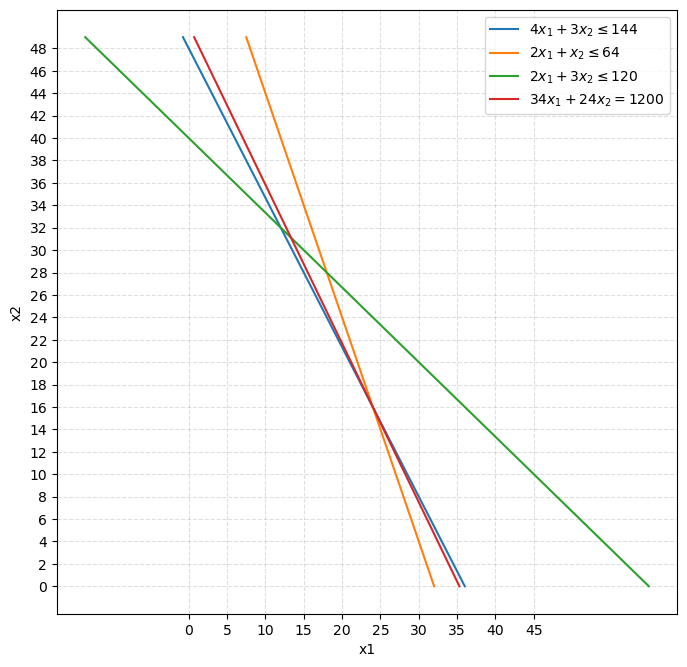

In [233]:
plot_x1 = np.arange(0, 50, 1)
plot_x2 = np.arange(0, 50, 1)

plot_x1_pro1 = (144 - 3*plot_x2 )/4
plot_x1_pro2 = (64 - plot_x2)/2
plot_x1_pro3 = (120 - 3*plot_x2)/2

plot_x1 = (1200 - 24*plot_x2)/34

pl.figure(figsize=(8, 8), dpi=100)

pl.plot(plot_x1_pro1, plot_x2, label='$4x_1 + 3x_2 \leq 144$')
pl.plot(plot_x1_pro2, plot_x2, label='$2x_1 + x_2 \leq 64$')
pl.plot(plot_x1_pro3, plot_x2, label='$2x_1 + 3x_2 \leq 120$')
pl.plot(plot_x1, plot_x2, label='$34x_1 + 24x_2 = 1200$')

pl.xlabel('x1')
pl.ylabel('x2')

pl.xticks(np.arange(0, 50, 5))
pl.yticks(np.arange(0, 50, 2))

pl.grid(alpha=.4,linestyle='--')
pl.legend()
pl.show()

Now, create `z2` maximization problem which represents $z_2$ creteria

In [234]:
z2 = pulp.LpProblem('min-problem', pulp.LpMinimize)

By analogy with the previous example create variables which will represent $x_1$ and $x_2$ and add objective equation and limits to the model. Note that if we simply reuse variable `x1` and `x2` from above - we will receive unexpected results from `pulp`, so we need to create new variables (at least as far as I am aware) 

In [235]:
x1_ = pulp.LpVariable('x1_', lowBound=0)
x2_ = pulp.LpVariable('x2_', lowBound=0)

In [236]:
z2 += -8*x1_ - 7*x2_ + 328
z2 += 4*x1_ + 3*x2_ <= 144
z2 += 2*x1_ + x2_ <= 64
z2 += 2*x1_ + 3*x2_ <= 120

Consider that application of creterias $z_1$ and $z_2$ must be consistent in regards to the targeting object, meaning that we need to apply to a hypothetical sigle object two creterias: both $z_1$ and $z_2$ and we have to find the one and only object (which consists of $x_1$ and $x_2$ values) that maximizes the first creteria and minimizes the second one as good as possible. So both $z_1$ and $z_2$ will share the same object that will provide the needed result. 

In this case we also need to consider the result which we got from creteria $z_1$ as one of the limiting bounds for finding $z_2$ creteria which is represented below.

Note that `1200` is the result of finding such an object which holds $x_1$ and $x_2$ values that maximized `z1` from the above code.

I would also recomend using `pulp.value(z1.objective)` instead of constant values like `1200` in the real code (as the value of `pulp.value(z1.objective)` will automatically change if you would like to provide `z1` with a different problem), but for the purpose of this notebook and to make it more math-like, we will stick with the constant value.

In [237]:
z2 += 34*x1_ + 24*x2_ >= 1200

Solve `z2` problem and output the feasibility of its solution values. In this case it is `Optimal` which is good

In [238]:
z2.solve()
pulp.LpStatus[z2.status]

'Optimal'

Output value of `z2`. It is `24` in our case. Save it into the variable `before_concession` for later use. Note that this result is literally the result before applying the concession of 1.5% as required in the task description. Later we will find the value of $z_2$ creteria after appying the concession and compare to the current.

In [239]:
before_concession = pulp.value(z2.objective)
before_concession

24.0

Below we instantiate a new `z2_` problem which represents $z_2$ creteria after applying the concession of 1.5%.

*Side note:*

Unfortunately, I was not able to find a way to reuse the code above like, for example, `z2` problem. Did not find a way to remove limiting bound or constraints of the objective as the are called in the `pulp` lib documentation. Making a deepcopy of `z2` object right before adding the final limiting bound didn't work too as it gave unexpected results. That is why we are forced to create new problem instance from scratch and add some similar limiting bounds as in `z2` instance

In [240]:
z2_ = pulp.LpProblem('min-problem', pulp.LpMinimize)

z2_ += -8*x1_ - 7*x2_ + 328
z2_ += 4*x1_ + 3*x2_ <= 144
z2_ += 2*x1_ + x2_ <= 64
z2_ += 2*x1_ + 3*x2_ <= 120

Create and display `z1_after_concession` variable which represents `z1` maximized result minus 1.5% as required by the task, `z1_after_concession` is `1182` in our case

In [241]:
z1_after_concession = 1200/100 * 98.5
z1_after_concession

1182.0

Add the final limiting bound to the `z2_` instance. It is very similar to the case final bound of `z2` but in this case we limit it by `z1_after_concession` value instead of `1200` as, according to the task, we want to find such $z_2$ value which we are able to get by conceding 1.5% of the maximal value of $z_1$ createria.
`1200` is $z_1$ max value; `z1_after_concession` is $z_1$ max value with 1.5% concession

In [242]:
z2_ += 34*x1_ + 24*x2_ >= z1_after_concession

Show feasibility of the result

In [243]:
z2_.solve()
pulp.LpStatus[z2_.status]

'Optimal'

Show the resulring value of $z_2$ creteria after concession

In [244]:
after_concession = pulp.value(z2_.objective)
after_concession

12.0

`12` is 50% present better than `24` (which is additionally demonstrated below). 

So as the result of conceding main $z_1$ creteria by only 1.5% we were able to gain +50% efficiency of the second $z_2$ creteria. 

This is considered a good example of the method of successive concessions where we try to concede a small part of main creteria in order to get much better result in the following creterias and the overall gain from such a move gives us much more optimal decisions

In [245]:
percent_diff = f'{(before_concession - after_concession)/(before_concession/100)}%'
percent_diff

'50.0%'

Now as we found optimal answer we can plot $z_2$ having $z_2 = 12$. The dicrease of $z_2$ is goin to the side of the increase of $x_2$. So as we need to minimize $z_2$, we may infer the values of $x_1 = 15$ and $x_2 = 28$ from the plot (you may want to insert this values into the $-8x_1 - 7x_2 + 328 = 12$ equation to check if they are correct)

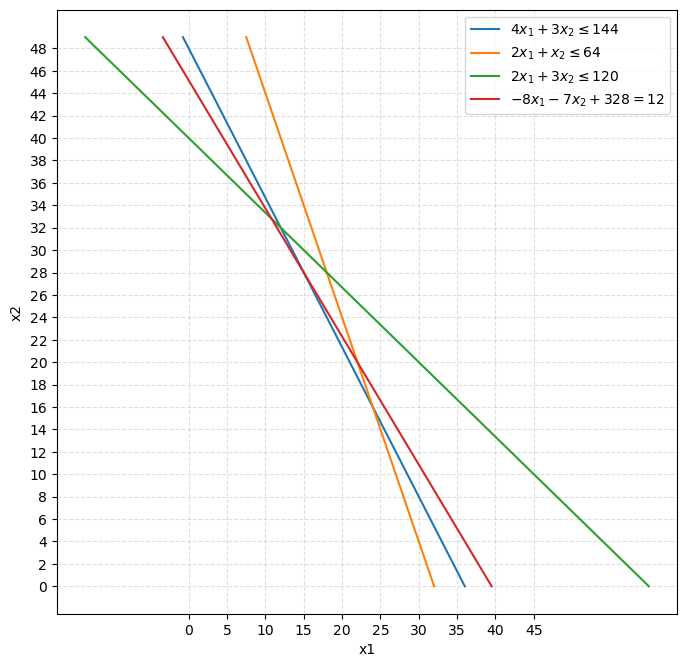

In [246]:
plot_x1 = np.arange(0, 50, 1)
plot_x2 = np.arange(0, 50, 1)

plot_x1_pro1 = (144 - 3*plot_x2 )/4
plot_x1_pro2 = (64 - plot_x2)/2
plot_x1_pro3 = (120 - 3*plot_x2)/2

plot_x1 = (12 + 7*plot_x2 - 328)/(-8)

pl.figure(figsize=(8, 8), dpi=100)

pl.plot(plot_x1_pro1, plot_x2, label='$4x_1 + 3x_2 \leq 144$')
pl.plot(plot_x1_pro2, plot_x2, label='$2x_1 + x_2 \leq 64$')
pl.plot(plot_x1_pro3, plot_x2, label='$2x_1 + 3x_2 \leq 120$')
pl.plot(plot_x1, plot_x2, label='$-8x_1 - 7x_2 + 328 = 12$')

pl.xlabel('x1')
pl.ylabel('x2')

pl.xticks(np.arange(0, 50, 5))
pl.yticks(np.arange(0, 50, 2))

pl.grid(alpha=.4,linestyle='--')
pl.legend()
pl.show()

#### General case
Well, the example above was a pretty simple one - it has only two criterias to chose from.
In another problem or the real world problem we may have much more criterias to chose from.
However, the main principle remains the saim:
1. Arrange criterias from the most important to the least important
2. Find the amount of the concession or the proportion of this concession for each pair of criterias (like the amount of the gain must be $n$ times greater than amount of concession, $n > 1$). It may take additional precalculations
3. Start solving equations and on each new step when we calculate next criteria add new limiting bound to the linear problem from the solution of previous criteria + chosen concession.

#### Downsides:
The main downside of the method is subjectivity of criterias - we don't certainly know when one decision will be more optimal then another and therefore we don't know what concession percentage will prove to be the best in concrete case.
In this case we had only two criterias and concession percentage was already given by the task - however real world problems migth be much more complex in that regard.

### Real-world example
Before reading bare in mind that the whole point of the successive concession method is to gain much more in less important creterias by conceding a small part of more important criterias.

Note that in the example in this notebook the creterias and solution are quite formal and math-like. In the real world problem you might have a bunch of objects, say, `Job` which holds some attributes like:
 
 `x1 is time_to_commute`; 
 
 `x2 is salary`; 
 
 `x3 is perspectives`
 
So you have a set of object with like `Job(x1, x2, x3)`. You might have criterias like `z1`, `z2`, `z3`.
In the above mathimatical example such creterias seem to be quite complex - they are represented in the form of equations. But in this example with the job object this creterias will be very simple:

$$
z1 = x1 \,\to\, min \\
z2 = x2 \,\to\, max \\
z3 = x3 \,\to\, max \\
$$

You may arrange your creterias from the most important to the least important in the following way:

$$
z3 \succ z2 \succ z1
$$

Thus, `z3` is our main criteria.

Then you migth want to set concession limit of 20%, for instance. This means you can at most sacrifice 20% of any of your  criterias in order to improve other criterias and no more. Maybe in your case you would like to set this limit to different values depending on which pair of criterias you are looking at.

After that you can iterate over your set of `Job` objects and find the one that maximizes your most important `z3` criteria. Name this value `z3_`. Calculate second creteria by finding the object that has `z3` criteria value greater or equal (in this case value won't be greter as `z3` is already at max but in a more general case we would need to use `greter or equal`, so we leave it) to `z3_` and also maximal value of `z2` criteria which will be `z2_`. And finally find the object which has values of `z3` and `z2` greater or equal to values of `z3_` and `z2_` and also has min value of `z1` (as we try to minimize 3d criteria) which will be called `z1_`.
Save the object and its criterial values as `res` inside `r` array (`r` might further hold multiple `res`). Also save all concession levels of all criterias, which in the current case, as we haven't yet introduced concessions will be 0%, 0%, 0% for `z1`, `z2` and `z3` respectively.

Thus, we will get our resulting `Job` object. But it may not be optimal, so we will need to use concessions.

Apply the starting concession - say 1%. Repeat the above described procedure of finding resulring `Job` object. Of course don't forget to subtract from each `z*_` value the concession of 1%. After calculating each criteria stop and compare if you gain is much more considerable then you loss in 1% of the previous criteria. Note that the measurement of "much more considerable" (let's call it `mmc`) is biased and specific to each pair of creterias and it must be chosen beforehand. If there is an object which is much more considerable by any parameter, save it with its valuew of `z*_` and concessions and compare it (let's give "it" a name `obj`) with each `res` value inside `r` array in the following way:

* if gain to loss ratio of at least one criteria in `obj` is greater than in `res` and there are no criterias in `res` that are bigger than respective ones in `obj` - `obj` is bigger.
* if some gain to loss ratios of `obj` are greter but some are not then find the first criteria which two objects differ, name it `first` (remember that this criteria is more important as it goes before the others). Then calculate the sum of ratios from this criteria inclusive - if one of this sums is bigger than another one in `extreme` times or more and is also greater by `first` creteria then this element is greater if it is not is bigger than another one in `extreme` times or more but NOT greater by `first` creteria then we cannot tell which element - `obj` or `res` is greater. If none of the elements is bigger than another in `extreme` times or more then the element which has greater value of `first` is greater.

If we found any `res` element in the `r` array which is less then `obj` then we delete such `res` element and if in the end any res values were deleted - we insert `obj` into `r` array as `res`. If there was at least one time when we couldn't determine which element is bigger then in the end after deleting any `res` elements less than `obj`. we insert `obj` into `r` array as `res`

Then iterate over the set of initial `Job` objects and start increasing concession percentage by 1% until preset limit of 20% is reached. Start increasing concessions from the last two criterias to the first two and iterate over all combinations.
E. g. start like that `1% 1% 2%` until you reach `1% 1% 20%` then go to `1% 1-20% 1%`, then `1% 1-20% 1-20%`, then `1-20% 1% 1%`, then `1-20% 1% 1-20%`, then `1-20% 1-20% 1%`, then `1-20% 1-20% 1-20%`. You might iterate in a different manner, but the point is to go through all combinations. On each iteration perform previous step with comparisons to find object which has `mmc` and compare it with elements in `r`

In the end you are going to have a resulting `r` list full of its elements (element of `r` is basically a wrapper on the `Job` object which has some additional params), so you have resulting list of `Job`s that may be considered optimal in one way or another. Then it is needed to manually see the array through and chose the best option or use another comparison algorithm.

*Unfortunately, current real world example appeared to be too conceptual and possibly confusing. So I might consider writing some code for this example in the future.*

#### Downsides:
As you can see this approach is by no means efficient in terms of time complexity. Current representation is a brute-force approach 

#### Rational on downsides
Current presented algorithm is a brute force approach mainly because we don't know optimal values of concessions beforehandly.
Note that if for your problem you define another not as wide limitations - different concession bounds or you use another approach in comparison of `res` to `obj` - you might optimize this approach for your case a little bit. 

Note that this algorithm is not oprimized because of subjectivity of criterias also. We don't know exact bounds of when one `Job` object will become more optimal than another. The first object might have first criteria greater in 100 times. But second object might have 3rd criteria better in 1000 times. What do we chose than? In our case we don't know ot for sure so we collect all `Job` objects that may have some extreme values and we are forced to iterate over each and every object with different concessions to find such.If you introduce stronger criterial hierarchy or specific limitations or more criteria connections - you might improve the approach, even though it might then get beyond the scope of classic method of sucessive concession.

### General Note:
Please be advised that I do not deem myself an expert in this subject. These are my vision and thoughts on the method of successive concessions